#1aq1

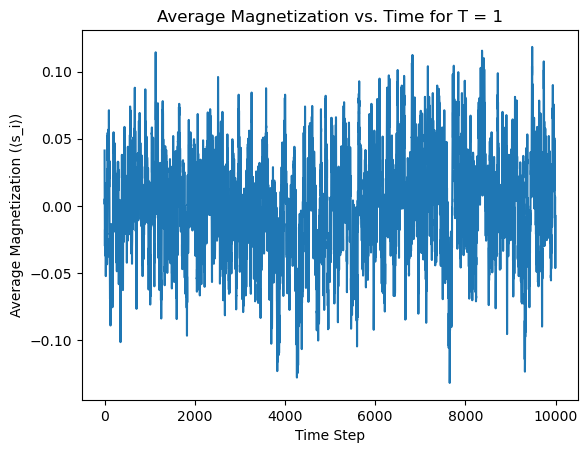

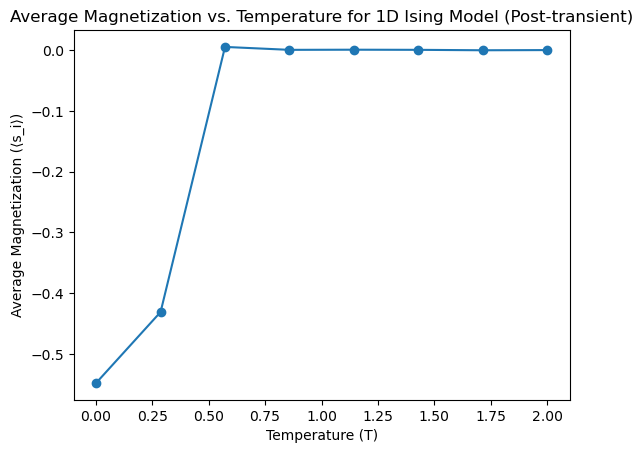

In [77]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

# 1. Initialize the lattice with random spin states (Numba-compatible)
@nb.njit
def initialize_lattice(N):
    lattice = np.zeros(N, dtype=np.int32)
    for i in range(N):
        # Randomly choose between -1 and 1
        lattice[i] = 1 if np.random.randint(0, 2) == 1 else -1
    return lattice

# Metropolis algorithm using Numba for lattice updates
@nb.njit
def metropolis_step(lattice, J, T):
    N = lattice.size
    for i in range(N):
        # Randomly select a site
        site = np.random.randint(0, N)
        
        # Calculate energy difference
        delta_E = 2 * J * lattice[site] * (lattice[(site - 1) % N] + lattice[(site + 1) % N])
        
        # Metropolis algorithm: accept or reject the spin flip
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            lattice[site] = -lattice[site]
            
    return lattice

# 2. Monte Carlo simulation with magnetization tracking
@nb.njit
def ising_simulation_with_magnetization_tracking(N, J, T, n_steps):
    lattice = initialize_lattice(N)
    magnetization_list = np.zeros(n_steps)  # Use NumPy array instead of list
    
    for step in range(n_steps):
        # Perform a Metropolis step
        lattice = metropolis_step(lattice, J, T)
        
        # Compute the average spin of the lattice
        magnetization = np.sum(lattice) / N
        magnetization_list[step] = magnetization  # Track magnetization
    
    return magnetization_list

# 3. Compute average spin in equilibrium state
@nb.njit
def ising_simulation(N, J, T, n_steps, n0):
    lattice = initialize_lattice(N)
    magnetization_list = np.zeros(n_steps)
    
    for step in range(n_steps):
        # Perform a Metropolis step
        lattice = metropolis_step(lattice, J, T)
        
        # Compute the average spin of the lattice
        magnetization = np.sum(lattice) / N
        magnetization_list[step] = magnetization
    
    # Compute the average spin after transient (for n > n0)
    if n_steps > n0:
        return np.mean(magnetization_list[n0:])  # Compute after n0 steps
    else:
        return np.mean(magnetization_list)

# 4. Parallelized simulation for multiple temperatures
@nb.njit(parallel=True)
def simulate_multiple_temperatures(N, J, T_values, n_steps, n0):
    avg_magnetizations = np.zeros(len(T_values))
    
    for i in nb.prange(len(T_values)):  # Parallel loop using prange
        T = T_values[i]
        avg_magnetization = ising_simulation(N, J, T, n_steps, n0)
        avg_magnetizations[i] = avg_magnetization
    
    return avg_magnetizations

# Plot magnetization vs time (not Numba-compatible, so kept outside)
def plot_magnetization_vs_time(magnetization_list, n_steps, T):
    plt.plot(range(n_steps), magnetization_list)
    plt.xlabel('Time Step')
    plt.ylabel('Average Magnetization (⟨s_i⟩)')
    plt.title(f'Average Magnetization vs. Time for T = {T}')
    plt.show()

# Plot average magnetization vs temperature (not Numba-compatible, so kept outside)
def plot_avg_magnetization_vs_temperature(T_values, avg_magnetizations):
    plt.plot(T_values, avg_magnetizations, 'o-')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Average Magnetization (⟨s_i⟩)')
    plt.title('Average Magnetization vs. Temperature for 1D Ising Model (Post-transient)')
    plt.show()

# Parameter setup
N = 5000  # Lattice size
J = 1.0  # Coupling constant
T_values = np.linspace(0.001, 2, 8)  # Temperature range
n_steps = 100000  # Total simulation steps (nmax)


# Step 1: Test n0 by selecting it through the magnetization vs. time curve
T_test = 1  # Selected temperature to test n0
n_steps_test = 10000  # Number of steps to test

# Track magnetization over time
magnetization_list = ising_simulation_with_magnetization_tracking(N, J, T_test, n_steps_test)
# Plot the magnetization vs. time curve
plot_magnetization_vs_time(magnetization_list, n_steps_test, T_test)

# Step 2: After determining n0, simulate for multiple temperatures in equilibrium
n0 = 1000  # Steps before stability (transient period)
avg_magnetizations = simulate_multiple_temperatures(N, J, T_values, n_steps, n0)
# Plot temperature vs average magnetization
plot_avg_magnetization_vs_temperature(T_values, avg_magnetizations)


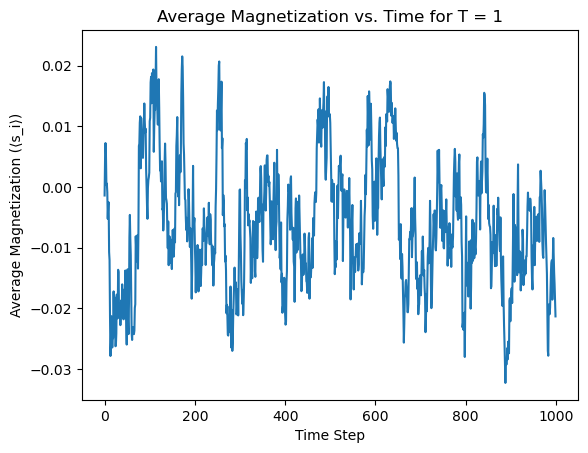

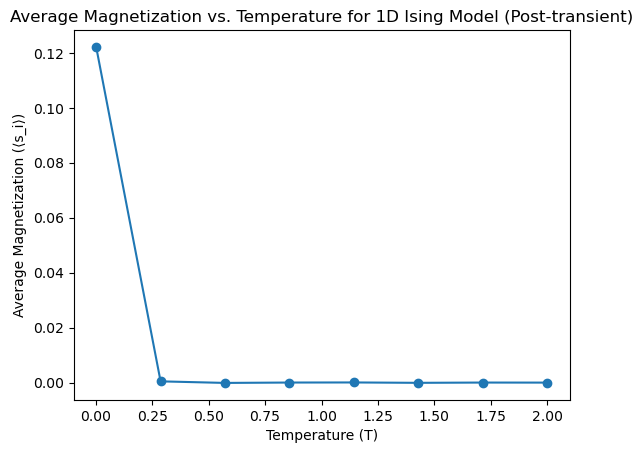

In [80]:
##infact very nearly zero
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

# 1. Initialize the lattice with random spin states (Numba-compatible)
@nb.njit
def initialize_lattice(N):
    lattice = np.zeros(N, dtype=np.int32)
    for i in range(N):
        # Randomly choose between -1 and 1
        lattice[i] = 1 if np.random.randint(0, 2) == 1 else -1
    return lattice

# Metropolis algorithm using Numba for lattice updates
@nb.njit
def metropolis_step(lattice, J, T):
    N = lattice.size
    for i in range(N):
        # Randomly select a site
        site = np.random.randint(0, N)
        
        # Calculate energy difference
        delta_E = 2 * J * lattice[site] * (lattice[(site - 1) % N] + lattice[(site + 1) % N])
        
        # Metropolis algorithm: accept or reject the spin flip
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            lattice[site] = -lattice[site]
            
    return lattice

# 2. Monte Carlo simulation with magnetization tracking
@nb.njit
def ising_simulation_with_magnetization_tracking(N, J, T, n_steps):
    lattice = initialize_lattice(N)
    magnetization_list = np.zeros(n_steps)  # Use NumPy array instead of list
    
    for step in range(n_steps):
        # Perform a Metropolis step
        lattice = metropolis_step(lattice, J, T)
        
        # Compute the average spin of the lattice
        magnetization = np.sum(lattice) / N
        magnetization_list[step] = magnetization  # Track magnetization
    
    return magnetization_list

# 3. Compute average spin in equilibrium state
@nb.njit
def ising_simulation(N, J, T, n_steps, n0):
    lattice = initialize_lattice(N)
    magnetization_list = np.zeros(n_steps)
    
    for step in range(n_steps):
        # Perform a Metropolis step
        lattice = metropolis_step(lattice, J, T)
        
        # Compute the average spin of the lattice
        magnetization = np.sum(lattice) / N
        magnetization_list[step] = magnetization
    
    # Compute the average spin after transient (for n > n0)
    if n_steps > n0:
        return np.mean(magnetization_list[n0:])  # Compute after n0 steps
    else:
        return np.mean(magnetization_list)

# 4. Parallelized simulation for multiple temperatures
@nb.njit(parallel=True)
def simulate_multiple_temperatures(N, J, T_values, n_steps, n0):
    avg_magnetizations = np.zeros(len(T_values))
    
    for i in nb.prange(len(T_values)):  # Parallel loop using prange
        T = T_values[i]
        avg_magnetization = ising_simulation(N, J, T, n_steps, n0)
        avg_magnetizations[i] = avg_magnetization
    
    return avg_magnetizations

# Plot magnetization vs time (not Numba-compatible, so kept outside)
def plot_magnetization_vs_time(magnetization_list, n_steps, T):
    plt.plot(range(n_steps), magnetization_list)
    plt.xlabel('Time Step')
    plt.ylabel('Average Magnetization (⟨s_i⟩)')
    plt.title(f'Average Magnetization vs. Time for T = {T}')
    plt.show()

# Plot average magnetization vs temperature (not Numba-compatible, so kept outside)
def plot_avg_magnetization_vs_temperature(T_values, avg_magnetizations):
    plt.plot(T_values, avg_magnetizations, 'o-')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Average Magnetization (⟨s_i⟩)')
    plt.title('Average Magnetization vs. Temperature for 1D Ising Model (Post-transient)')
    plt.show()

# Parameter setup
N = 50000  # Lattice size
J = 1.0  # Coupling constant
T_values = np.linspace(0.001, 2, 8)  # Temperature range
n_steps = 500000  # Total simulation steps (nmax)


# Step 1: Test n0 by selecting it through the magnetization vs. time curve
T_test = 1  # Selected temperature to test n0
n_steps_test = 1000  # Number of steps to test

# Track magnetization over time
magnetization_list = ising_simulation_with_magnetization_tracking(N, J, T_test, n_steps_test)
# Plot the magnetization vs. time curve
plot_magnetization_vs_time(magnetization_list, n_steps_test, T_test)

# Step 2: After determining n0, simulate for multiple temperatures in equilibrium
n0 = 1000  # Steps before stability (transient period)
avg_magnetizations = simulate_multiple_temperatures(N, J, T_values, n_steps, n0)
# Plot temperature vs average magnetization
plot_avg_magnetization_vs_temperature(T_values, avg_magnetizations)
